# Amy Siskind's Lists

Ms. Siskind creates a weekly list that she posts on medium.  She posts the lists to her facebook and twitter accounts.

This notebook harvests those lists and performs whatever analysis that I can think of.

# Harvest the Lists

## List of Links to Harvest

When she posted the latest lists she posts the google short links to the other list.  This seemed to be the best way to get at the url to each list.

*Please note that week 41 is my (MisoMunje's) google shorterned link. When you click on a shortened link, google redirects you to the longer link.  Note that google also collects information on you and where you are going when it does this. I don't know what information google provides to the shortener (wk41 me, <wk41 Ms. Siskind?).*

In [56]:
asLinks="""
Week 1: https://goo.gl/KWlyOO Week 2: https://goo.gl/Pn7MFs
Week 3: https://goo.gl/CZwxsX Week 4: https://goo.gl/JhwuON
Week 5: https://goo.gl/TGM6x8 Week 6: https://goo.gl/uhyjxe
Week 7: https://goo.gl/bMdhTG Week 8: https://goo.gl/89MW8h
Week 9: https://goo.gl/ekv9wE Week 10: https://goo.gl/RETyH1
Week 11: https://goo.gl/6cs0tt Week 12: https://goo.gl/bRMx5o
Week 13: https://goo.gl/xzdjyY Week 14: https://goo.gl/1HwN4H
Week 15: https://goo.gl/JxVghS Week 16: https://goo.gl/sZpudG
Week 17: https://goo.gl/QymWmJ Week 18: https://goo.gl/Ri6E9N
Week 19: https://goo.gl/L6JOSV Week 20: https://goo.gl/PvlahQ
Week 21: https://goo.gl/XDjZFw Week 22: https://goo.gl/AQydgj
Week 23: https://goo.gl/FlWS69 Week 24: https://goo.gl/O2c7Th
Week 25:https://goo.gl/bJi31u Week 26: https://goo.gl/KhFQ7Y
Week 27: https://goo.gl/6Kgby0 Week 28: https://goo.gl/teZ4i4
Week 29: https://goo.gl/HKaBbO Week 30: https://goo.gl/FJqUBe 
Week 31: https://goo.gl/17cXD4 Week 32: https://goo.gl/7ZW7hJ
Week 33: https://goo.gl/qoXSqG Week 34: https://goo.gl/CHsG4A
Week 35: https://goo.gl/Mj2fES Week 36: https://goo.gl/YeHCo1
Week 37: https://goo.gl/bTEMQ4 Week 38: https://goo.gl/onxULz
Week 39: https://goo.gl/uChJHT Week 40: https://goo.gl/sFdRQ6
Week 41: https://goo.gl/mZpaFA Week 42: https://goo.gl/sFdRQ6
Week 43: https://goo.gl/Vq64E6 Week 44: https://goo.gl/gzLBvL
Week 45: https://goo.gl/zeyt9J
"""

To turn this into a list of urls, let us use python's regular expression library.  We scan the string for anything matching the pattern ```pat```.  A bit of quick list comprehension to capture the week as an integer.

In [57]:
import re
pat="Week (\d+): *(https://goo.gl/......)"
wkLinkArray=[ [int(wk),link] for wk,link in re.findall(pat,asLinks)]

The first 5 elements of our list.

In [58]:
wkLinkArray[:7]

[[1, 'https://goo.gl/KWlyOO'],
 [2, 'https://goo.gl/Pn7MFs'],
 [3, 'https://goo.gl/CZwxsX'],
 [4, 'https://goo.gl/JhwuON'],
 [5, 'https://goo.gl/TGM6x8'],
 [6, 'https://goo.gl/uhyjxe'],
 [7, 'https://goo.gl/bMdhTG']]

## Harvesting

Here each link is pulled from the url and the python library ```bs4``` (beautifulSoup) is used to parse the list elements.

The goal is to get a list of python dictionaries and feed it to python's ```pandas```. (Sounds weird doesn't it). Ultimately, we will have a ```pandas.DataFrame```.

In [59]:
%matplotlib notebook

In [60]:
import bs4
import pandas as pd
import requests

There is probably an elegant way to do this but I am just going to bang this out.  At least the week number will be printed out as the for loop executes.  Enjoy -- it is very hacker-esh.

In [61]:
da=[]
print("Fetching:")
pPat='(\d+)\. |^16 '

for wk,turl in wkLinkArray:
    dw={'wk':wk,'url':turl,}
    res=requests.get(turl)
    bs=bs4.BeautifulSoup(res.text,"lxml")
    grafs=bs.findAll('li',{'class':'graf'})
    if len(grafs)==0:
        grafs=[ g for g in bs.findAll('p',{'class':'graf'}) if re.search(pPat,g.text)]
    print("  {:02d}-{:03d}".format(wk,len(grafs)),end='')
    if wk%5==0: print()
    for n,g in enumerate(grafs):
        if n==0 and 'published' in g.text.lower(): continue
        diw=dw.copy()
        diw['n']=n
        diw['text']=g.text
        links=list(map(lambda x: str(x),g.findAll('<a>')))
        diw['links']=' | '.join(links)
        da.append(diw)        

asdf=pd.DataFrame(da)

Fetching:
  01-009  02-018  03-026  04-022  05-020
  06-017  07-017  08-028  09-036  10-041
  11-050  12-057  13-052  14-065  15-066
  16-064  17-064  18-066  19-067  20-075
  21-067  22-070  23-063  24-067  25-073
  26-093  27-105  28-093  29-080  30-078
  31-085  32-082  33-089  34-096  35-106
  36-095  37-110  38-110  39-101  40-106
  41-108  42-106  43-107  44-119  45-107


We have a pandas dataframe.

In [62]:
asdf[:5]

,links,n,text,url,wk
0,,0,"Acts of hate — for the first 400 per SPLC, I c...",https://goo.gl/KWlyOO,1
1,,1,Reporters critique their own paper’s coverage ...,https://goo.gl/KWlyOO,1
2,,2,A president-elect is openly (on Twitter!) tryi...,https://goo.gl/KWlyOO,1
3,,3,"The media, including traditional media, covere...",https://goo.gl/KWlyOO,1
4,,4,Major media following Trump’s reality show sto...,https://goo.gl/KWlyOO,1


In [63]:
print("Don't worry MisoMunje, there are")
print("only {} authoritarian notable items".format(len(asdf)))
print("in {} weeks.".format(max(asdf['wk'])))

Don't worry MisoMunje, there are
only 3176 authoritarian notable items
in 45 weeks.


## Wrangle it

The week number is when Amy Siskind started her list.  Looks like week 1 corresponds to the week that ends 2016-11-19 (Saturday). The first week was published on Sunday 2016-11-20.  ISO weeks end on Sunday but I am guessing that Amy Siskind believes the week ends on Saturday like most normal people.  Anyway, let's get the weekend date.

In [64]:
import datetime as dt
listStart=dt.datetime(2016,11,19)
dwk=dt.timedelta(days=7)
asdf['WkEnd']=asdf.apply(lambda x: listStart+dwk*(x.wk-1),axis=1)

# Analyze

OK, we have the data.  Now what do we see. I will add sections to this part periodically.

## Number items per week

One simple measure of whether things are getting better or worse. Let's just count items each week.

Oh, suprise twist! MisoMunje "Beyond the pale" list!

In [65]:
mmbyp="""
2017-01-20	Inaugeration
2017-01-28	Travel Ban
2017-02-14	Flynn Fired
2017-03-20	Comey confirms FBI Russia Investigation
2017-05-09	James Comey Fired
2017-06-07	Comey Testimony
2017-07-31	WaPo Trump Involved in Jr Draft
2017-08-14	Unite the Right Many Sides
2017-08-25	Arpaio Huricane Harvey Pardon
2017-09-23	Attacks NFL and NBA players
"""
mmbyp=[ l.split('	') for l in mmbyp.split('\n') if len(l)>0]
bypdf=pd.DataFrame(mmbyp)
bypdf.columns=['sDate','Event']
bypdf['Date']=pd.to_datetime(bypdf['sDate'])

In [86]:
def addBeyondThePale(f,bypdf,yscale=120,alpha=1.):
    for bypd,bype in bypdf[['Date','Event']].values:
        tsbypd=pd.Timestamp(bypd)
        f.axes.axvline(tsbypd,color='r',linestyle='dashed',alpha=alpha)
        #f.axes.text(tsbypd,len(bype)*.2+.1,bype,rotation=90)   
        f.axes.text(tsbypd,len(bype)*.016*yscale+.1*yscale,bype,rotation=90,alpha=alpha)   
    return f

<IPython.core.display.Javascript object>


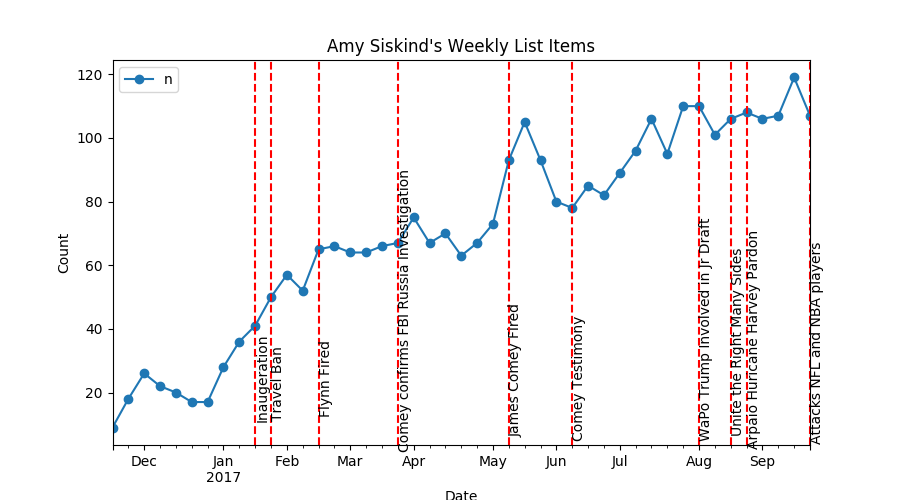

In [67]:
colsToUse=['wk','WkEnd','n']
aDict={'WkEnd':'max','n':'count'}
f=asdf[colsToUse].groupby('wk').agg(aDict).plot(x='WkEnd',y='n',marker='o',figsize=(9,5))
f.axes.set_xlabel('Date');f.axes.set_ylabel('Count')
f.set_title("Amy Siskind's Weekly List Items")
ff=addBeyondThePale(f,bypdf)

## Trump v. Not-Trump

**Untested, unproven theory. Do not even know if the data supports it.**

I think that Siskind's list items that do not mention Trump is bad.  The quality 'bad' is, of course, from my personal view of not wanting to live under an authoritarian government.

Anyway, this gives a potential statistic for for things getting better or worse.  List items that mention trump are worse than list items that do not mention Trump.  We can compare different scope Trump v. Not-Trump list items.

For those of us who don't like president cheeto we want to see the Trump v. Not-Trump ratio go down as Trump becomes isolated and his administration stops amplifying his neurotic ideas.  *Steely eyed missile man cold analysis is the goal. How am I doing so far?*


In [68]:
'TRUMP' in asdf['text'][1].upper()

True

In [73]:
asdf['Trump']=asdf['text'].apply(lambda x: 'TRUMP' in x.upper())
colsToUse=['wk','WkEnd','Trump','n']
aDict={'WkEnd':'max','n':'count','Trump':'sum'}
wkTrump=asdf[['wk','WkEnd','Trump','n']].groupby('wk').agg(aDict)

In [111]:
wkTrump['Trump Percent']=wkTrump['Trump']/wkTrump['n']*100
wkTrump['MA T Percent']=wkTrump['Trump Percent'].rolling(window=3,center=True).sum().fillna(0.)/3.

<IPython.core.display.Javascript object>


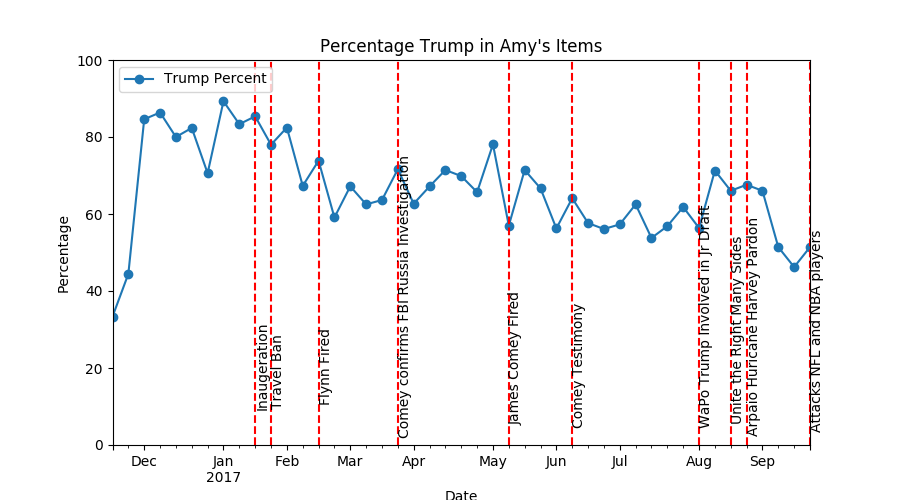

In [109]:
f=wkTrump.plot(x='WkEnd',y='Trump Percent',marker='o',figsize=(9,5))
f.axes.set_ylim([0,100.])
f.axes.set_xlabel('Date');f.axes.set_ylabel('Percentage')
f.set_title("Percentage Trump in Amy's Items")
ff=addBeyondThePale(f,bypdf,yscale=100.)


In [126]:
f.axes.get_ylim()

(0.0, 124.5)

<IPython.core.display.Javascript object>


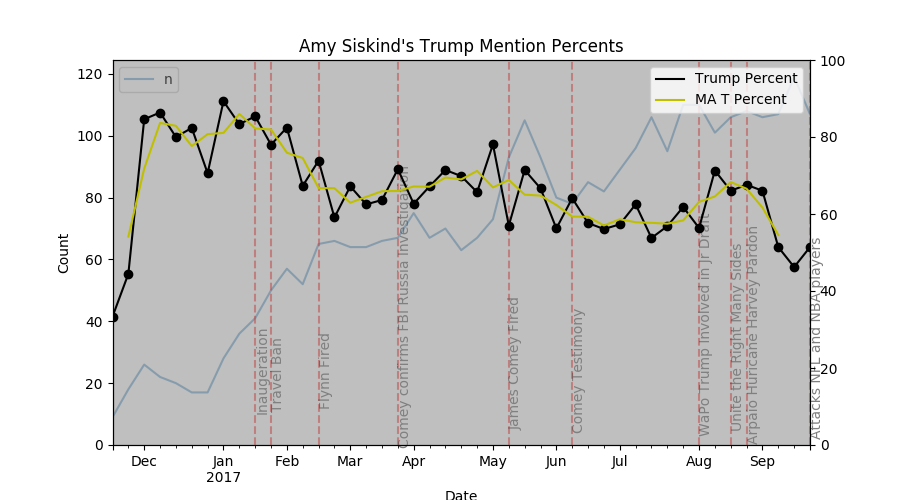

In [132]:
colsToUse=['wk','WkEnd','n']
aDict={'WkEnd':'max','n':'count'}
f=asdf[colsToUse].groupby('wk').agg(aDict).plot(x='WkEnd',y='n',figsize=(9,5),alpha=.5)
f.axes.set_xlabel('Date');f.axes.set_ylabel('Count')
f.set_title("Amy Siskind's Trump Mention Percents")
f.axes.set_ylim(ymin=0)
ff=addBeyondThePale(f,bypdf,alpha=.5)
ax=f.axes.twinx()
wkTrump.plot(x='WkEnd',y='Trump Percent',style='-ok',figsize=(9,5),ax=ax)
wkTrump[1:-2].plot(x='WkEnd',y='MA T Percent',style='-y',figsize=(9,5),ax=ax)
ax.set_ylim([0,100])
ymin,ymax=ax.get_ylim()
ax.axhspan(ymin,ymax,color='.5',alpha=.5)


In [107]:
wkTrump['Trump Percent'].rolling(window=3).sum().fillna(0.)/3

wk
1      0.000000
2      0.000000
3     54.131054
4     71.807822
5     83.659674
6     82.905526
7     77.647059
8     80.742297
9     81.069094
10    85.994967
11    82.233062
12    81.940665
13    75.921278
14    74.536662
15    66.748252
16    66.708188
17    62.926136
18    64.441288
19    65.926052
20    65.981607
21    67.157546
22    67.086472
23    69.478007
24    68.980494
25    71.198368
26    66.914360
27    68.833337
28    65.028162
29    64.781746
30    62.339744
31    59.333208
32    59.282395
33    57.015997
34    58.633644
35    57.858985
36    57.705230
37    57.477957
38    58.341308
39    63.156316
40    64.562834
41    68.305819
42    66.556021
43    61.677399
44    54.552697
45    49.674075
Name: Trump Percent, dtype: float64